In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Housing.csv')

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.shape

(545, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
## mIssing values
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [9]:
df.dropna(inplace = True)

In [10]:
### Drop duplicates
df.drop_duplicates(inplace=True)

In [11]:
df['mainroad'].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [12]:
df['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [13]:
df['furnishing_num'] =  np.where(df['furnishingstatus'] == 'unfurnished', 0, np.where(df['furnishingstatus'] == 'semi-furnished', 1, 2) )
df['furnishing_num']

0      2
1      2
2      1
3      2
4      2
      ..
540    0
541    1
542    0
543    2
544    0
Name: furnishing_num, Length: 545, dtype: int32

In [14]:
df = pd.get_dummies(df, columns = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea'], drop_first=True)

In [15]:
df

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,furnishing_num,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,13300000,7420,4,2,3,2,furnished,2,True,False,False,False,True,True
1,12250000,8960,4,4,4,3,furnished,2,True,False,False,False,True,False
2,12250000,9960,3,2,2,2,semi-furnished,1,True,False,True,False,False,True
3,12215000,7500,4,2,2,3,furnished,2,True,False,True,False,True,True
4,11410000,7420,4,1,2,2,furnished,2,True,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,unfurnished,0,True,False,True,False,False,False
541,1767150,2400,3,1,1,0,semi-furnished,1,False,False,False,False,False,False
542,1750000,3620,2,1,1,0,unfurnished,0,True,False,False,False,False,False
543,1750000,2910,3,1,1,0,furnished,2,False,False,False,False,False,False


In [16]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,furnishing_num,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,13300000,7420,4,2,3,2,furnished,2,True,False,False,False,True,True
1,12250000,8960,4,4,4,3,furnished,2,True,False,False,False,True,False
2,12250000,9960,3,2,2,2,semi-furnished,1,True,False,True,False,False,True
3,12215000,7500,4,2,2,3,furnished,2,True,False,True,False,True,True
4,11410000,7420,4,1,2,2,furnished,2,True,True,True,False,True,False


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,r2_score

In [18]:
X = df[['area']]
Y = df[['price']]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2)

In [20]:
X_train

,area
336,8080
510,2880
126,7160
24,8800
97,6400
...,...
16,6600
305,3450
320,4320
239,4000


In [21]:
 X_test

,area
48,4300
159,3150
475,3000
416,3450
81,4000
...,...
476,5850
163,6825
276,4400
161,6100


In [22]:
 y_train, y_test

(       price
 336  3920000
 510  2520000
 126  5880000
 24   8575000
 97   6300000
 ..       ...
 16   9100000
 305  4193000
 320  4060000
 239  4585000
 412  3430000
 
 [436 rows x 1 columns],
         price
 48    7455000
 159   5460000
 475   2961000
 416   3395000
 81    6615000
 ..        ...
 476   2940000
 163   5425000
 276   4305000
 161   5460000
 7    10150000
 
 [109 rows x 1 columns])

In [23]:
clf = LinearRegression()

In [24]:
clf.fit(X_train,y_train)

LinearRegression()

In [25]:
clf.coef_

array([[463.7021412]])

In [26]:
clf.intercept_

array([2367048.78573973])

In [27]:
y_pred = clf.predict(X_test)

In [28]:
y_pred

array([[4360967.99291302],
       [3827710.53052946],
       [3758155.209349  ],
       [3966821.17289039],
       [4221857.35055209],
       [5404297.81061997],
       [5371838.66073575],
       [4052606.06901296],
       [5357927.59649966],
       [5316194.40379138],
       [4342419.90726489],
       [3804525.42346931],
       [5497038.23886058],
       [5130713.54731014],
       [3841621.59476556],
       [4240405.43620021],
       [3758155.209349  ],
       [5807718.67346665],
       [5761348.45934634],
       [3897265.85170993],
       [4050287.55830695],
       [3132157.31872483],
       [3952910.1086543 ],
       [5093617.3760139 ],
       [4599774.59563261],
       [3421971.15697676],
       [3869443.72323774],
       [4388790.1213852 ],
       [3758155.209349  ],
       [3361689.87862036],
       [4050287.55830695],
       [6123036.12948475],
       [3591222.43851589],
       [7235921.26837217],
       [3833274.9562239 ],
       [5844814.8447629 ],
       [5970014.42288774],
 

In [29]:
mean_squared_error (y_test,y_pred)

2821337862090.606

In [30]:
r2_score(y_test,y_pred)

0.2912949747447062

In [31]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,furnishing_num,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,13300000,7420,4,2,3,2,furnished,2,True,False,False,False,True,True
1,12250000,8960,4,4,4,3,furnished,2,True,False,False,False,True,False
2,12250000,9960,3,2,2,2,semi-furnished,1,True,False,True,False,False,True
3,12215000,7500,4,2,2,3,furnished,2,True,False,True,False,True,True
4,11410000,7420,4,1,2,2,furnished,2,True,True,True,False,True,False


In [32]:
X = df.drop(columns =['price','furnishingstatus'])
y = df['price']


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2)

In [34]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 436 entries, 19 to 465
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   area                 436 non-null    int64
 1   bedrooms             436 non-null    int64
 2   bathrooms            436 non-null    int64
 3   stories              436 non-null    int64
 4   parking              436 non-null    int64
 5   furnishing_num       436 non-null    int32
 6   mainroad_yes         436 non-null    bool 
 7   guestroom_yes        436 non-null    bool 
 8   basement_yes         436 non-null    bool 
 9   hotwaterheating_yes  436 non-null    bool 
 10  airconditioning_yes  436 non-null    bool 
 11  prefarea_yes         436 non-null    bool 
dtypes: bool(6), int32(1), int64(5)
memory usage: 24.7 KB


In [35]:
clf =  LinearRegression()

In [36]:
clf.fit(X_train,y_train)

LinearRegression()

In [37]:
clf.coef_

array([[2.17037706e+02, 1.40481626e+05, 1.00139920e+06, 4.17841364e+05,
        2.72819636e+05, 2.30811761e+05, 4.92883232e+05, 3.57620881e+05,
        3.32921078e+05, 6.41127307e+05, 9.29086356e+05, 5.77712856e+05]])

In [38]:
clf.intercept_

array([-292654.01232927])

In [39]:
y_pred = clf.predict(X_test)

In [40]:
r2_score(y_test,y_pred)

0.6526784152480696

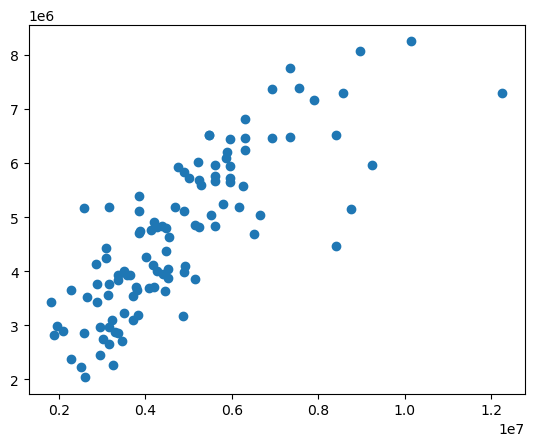

In [41]:
plt.scatter(y_test,y_pred)